In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# pd.set_option('display.max_columns', 10)
# pd.set_option('display.max_rows', 100)


In [3]:
ds_path = r".\data\GermanyUsedCars.zip"
dfo = pd.read_csv(ds_path, index_col=0, dtype_backend='pyarrow')
# dfo = pd.read_csv(ds_path, index_col=0)
dfo.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description'],
      dtype='object')

### Data exploration

In [ ]:
# dfo.shape
# dfo.isnull().count()
# dfo.isna().sum()
# dfo.isnull().sum()
# dfo.fuel_type.value_counts()
# dfo.color.value_counts()
# dfo.color.isna().sum()
# df.dtypes
# dfo.mileage_in_km.value_counts()
# dfo.mileage_in_km.isna().sum()
# dfo.dtypes
# dfo.shape[0] - pd.to_numeric(dfo.year, errors='coerce', dtype_backend = 'pyarrow').dropna(axis=0).shape[0]

In [4]:
def check_non_numeric(s:pd.Series):
    # print (s.dtype)
    if 'pyarrow' in str(s.dtype):
        idx = pd.to_numeric(s, errors='coerce', dtype_backend='pyarrow').isna()
    else:
        idx = pd.to_numeric(s, errors='coerce').isna()
    return idx  # return index of non numeric


### Data Cleansing

In [5]:
# drop non-numeric year values
df = dfo.copy()
# df = df[~check_non_numeric(df.year)].\
df = df[~((check_non_numeric(dfo.year)) | check_non_numeric(dfo.price_in_euro))].\
    assign(year = lambda x: x.year.astype(int))\
    .assign (price_in_euro = lambda x: x.price_in_euro.astype(float))
    # include only year values between (1900, 2023)
df = df.loc[df.year.between(1900, 2023)]

        
"number_of_dropped_rows:", dfo.shape[0]- df.shape[0]

('number_of_dropped_rows:', 199)

### Plots

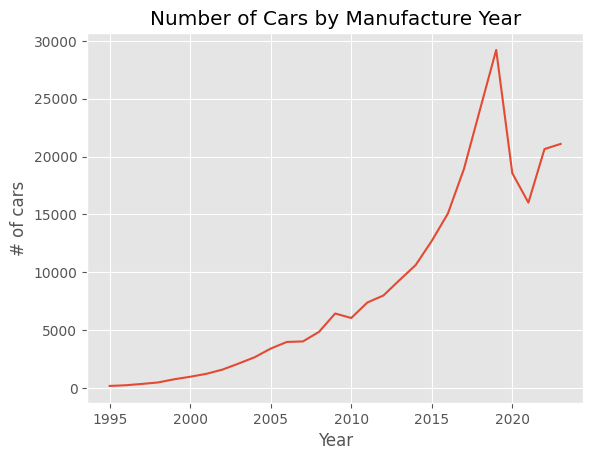

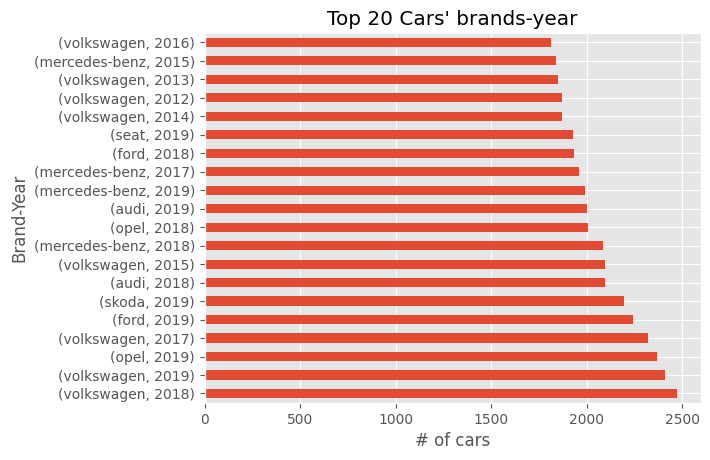

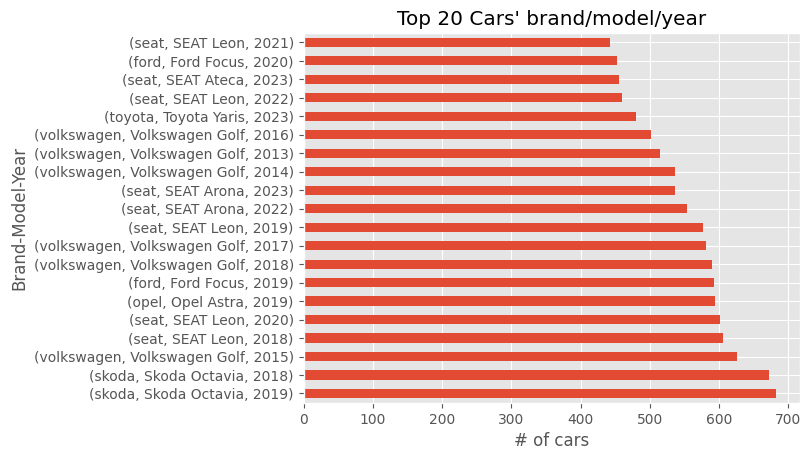

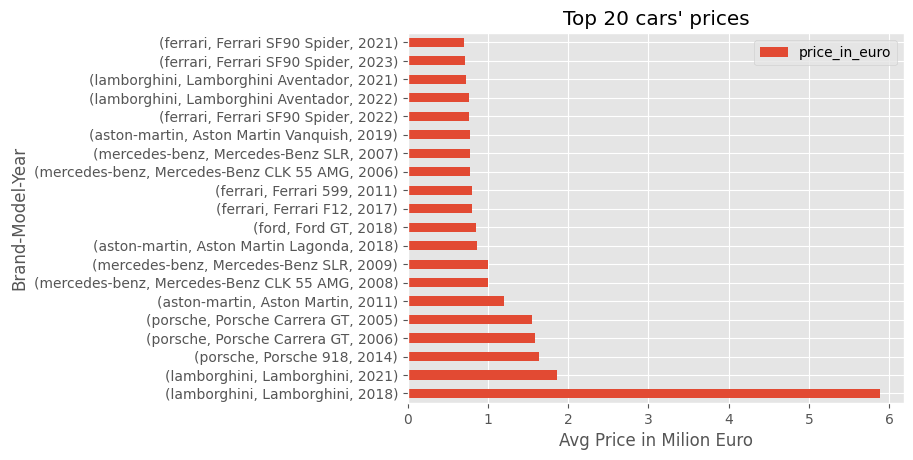

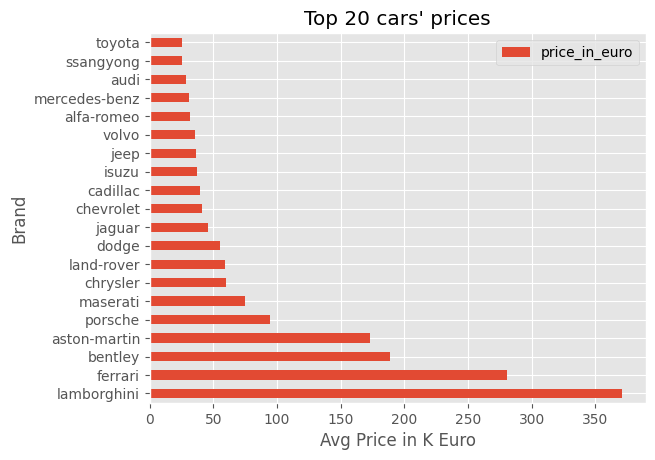

In [18]:
df['year'].value_counts().sort_index().plot(ylabel="# of cars", xlabel='Year', title="Number of Cars by Manufacture Year")
plt.show()
df[['brand', 'year']].value_counts().head(20).plot(kind='barh', xlabel="# of cars", ylabel='Brand-Year', title="Top 20 Cars' brands-year")
plt.show()
df[['brand', 'model', 'year']].value_counts().head(20).plot(kind='barh', xlabel="# of cars", ylabel='Brand-Model-Year', title="Top 20 Cars' brand/model/year")
plt.show()
df[['brand', 'model', 'year', 'price_in_euro']].groupby(['brand', 'model', 'year']).mean()\
    .sort_values('price_in_euro', ascending=False).head(20)\
    .assign(price_in_euro = lambda x: x/1000000) \
    .plot(kind='barh', xlabel="Avg Price in Milion Euro", ylabel='Brand-Model-Year', title="Top 20 cars' prices") 
plt.show()

df[['brand','price_in_euro']].groupby(['brand']).mean()\
    .sort_values('price_in_euro', ascending=False).head(20)\
    .assign(price_in_euro = lambda x: x/1000) \
    .plot(kind='barh', xlabel="Avg Price in K Euro", ylabel='Brand', title="Top 20 cars' prices") 
plt.show()

In [8]:
# Highest/Lowest average prices cars by brand-model-year
df[['brand', 'model', 'year', 'price_in_euro']].groupby(['brand', 'model', 'year']).mean().sort_values('price_in_euro', ascending=False)#.head(15)

price_in_euro
brand       model                   year               
lamborghini Lamborghini             2018      5890500.0
                                    2021      1857320.0
porsche     Porsche 918             2014      1640000.0
            Porsche Carrera GT      2006      1580000.0
                                    2005      1549000.0
...                                                 ...
rover       Rover 416               2000          499.0
            Rover 45                2001          495.0
volkswagen  Volkswagen Polo Variant 2000          450.0
saab        Saab 900                2000          350.0
volkswagen  Volkswagen Polo Variant 1999          250.0

[10537 rows x 1 columns]

In [13]:
categ = pd.DataFrame()
categ = categ.assign (brand = df.brand.astype('category').cat.codes)\
        .assign(model = df.model.astype('category').cat.codes)\
        .assign(year = df.year.astype('category').cat.codes)\
        .assign(price_in_euro = df.price_in_euro)\
        .assign(brand_year = (df.brand+"-"+df.year.astype(str)))#.astype('category').cat.codes)


# df[['brand', 'year', 'price_in_euro']].corr(numeric_only=True)
    # .sort_values('price_in_euro', ascending=False).describe()
# x[['brand', 'price_in_euro']].corr()
categ

,brand,model,year,price_in_euro,brand_year
0,0,14,0,1300.0,alfa-romeo-1995
1,0,7,0,24900.0,alfa-romeo-1995
2,0,18,0,5900.0,alfa-romeo-1995
3,0,18,0,4900.0,alfa-romeo-1995
4,0,7,1,17950.0,alfa-romeo-1996
...,...,...,...,...,...
251074,46,1301,28,57990.0,volvo-2023
251075,46,1304,28,89690.0,volvo-2023
251076,46,1296,28,61521.0,volvo-2023
251077,46,1301,28,57890.0,volvo-2023


In [23]:
categ[['brand_year', 'price_in_euro']].groupby('brand_year').agg(['mean', 'count'])#.head(20)#.plot(x='price_in_euro', y='price_in_euro')

price_in_euro      
                         mean count
brand_year                         
alfa-romeo-1995   9250.000000     4
alfa-romeo-1996   7456.000000     9
alfa-romeo-1997  13426.235294    17
alfa-romeo-1998   5019.714286     7
alfa-romeo-1999   5475.937500    16
...                       ...   ...
volvo-2019       34790.951932  1061
volvo-2020       41352.417832   572
volvo-2021       47843.649616   391
volvo-2022       53252.604278   374
volvo-2023       60842.702290   131

[968 rows x 2 columns]

### Working 

In [ ]:
# dfo.head()
# dfo.brand.value_counts()
# dfo[['year', 'registration_date']].head()
# df = dfo.assign(year_e = pd.to_numeric(dfo.year, errors='coerce'))
# df = dfo.assign(years_in_service = 2023-pd.to_numeric(dfo.year, errors='coerce'))
# dfo.year.astype(int, errors='ignore') - 2023
df[['brand', 'year', 'price_in_euro']].groupby(['brand', 'year']).mean()
# 2023 - dfo.year.astype(int, errors='ignore')
# df.head()
# df.years_on_service
# df.years_in_service = 2023 - df.years_in_service
# df = df.loc[df.years_in_service >= 0]
# df[['year', 'year_e']].value_counts()
# df[['year']].value_counts()


## Regression